In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Project_Final (2)\Project_Final\Cleaned_Data.csv")

In [82]:
df.isna().sum()

Unnamed: 0          0
Company             0
Rating              0
Field               0
Location            0
Reviews             0
Salaries            0
No_of_Interviews    0
No_of_jobs          0
No_of_Benefits      0
dtype: int64

In [83]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [84]:
df

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19700,49900.0,772.0,120,1600
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17900,69300.0,1400.0,155,2900
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17000,180000.0,2800.0,585,2600
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16000,59000.0,2200.0,1,1900
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15900,81000.0,1000.0,14,1300
...,...,...,...,...,...,...,...,...,...
1155,Shilpa Medicare,4.2,Automobile,Hyderabad / Secunderabad,679,4000.0,27.0,1,85
1156,Škoda Auto Volkswagen,3.4,Pharma,Pune,679,3700.0,51.0,7,57
1157,Salcomp Manufacturing,4.0,IT Services & Consulting,Chennai,681,5200.0,56.0,290,66
1158,NTT,4.1,Electronics Manufacturing,Mumbai,679,3700.0,59.0,1,78


### Univariate Analysis

In [86]:
df.head()

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19700,49900.0,772.0,120,1600
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17900,69300.0,1400.0,155,2900
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17000,180000.0,2800.0,585,2600
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16000,59000.0,2200.0,1,1900
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15900,81000.0,1000.0,14,1300


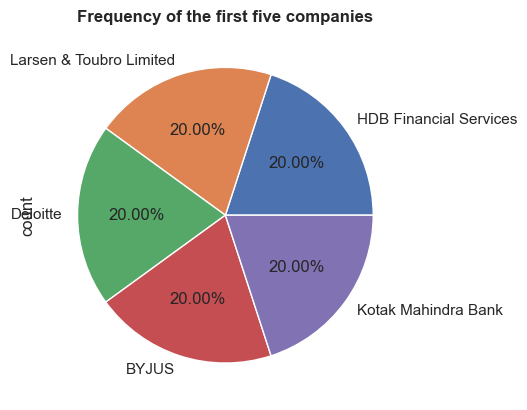

In [87]:
df['Company'].head().value_counts().plot(kind = 'pie',autopct = '%.2f%%')
plt.title('Frequency of the first five companies',fontweight = 'bold')
plt.show()

The pie chart shows an equal frequency distribution among five companies, each holding 20%. This indicates a balanced dataset among the top entries, potentially offering an even view for analysis

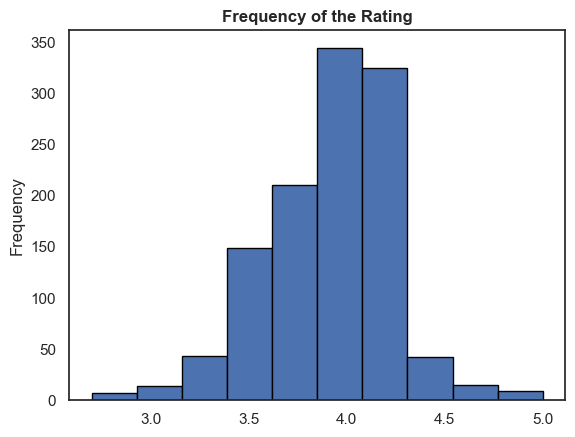

In [89]:
df['Rating'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Rating',fontweight = 'bold')
plt.show()

The distribution of ratings is highly concentrated around 4.0, highlighting a trend of predominantly high ratings. Ratings below and above 4.0 are notably less frequent

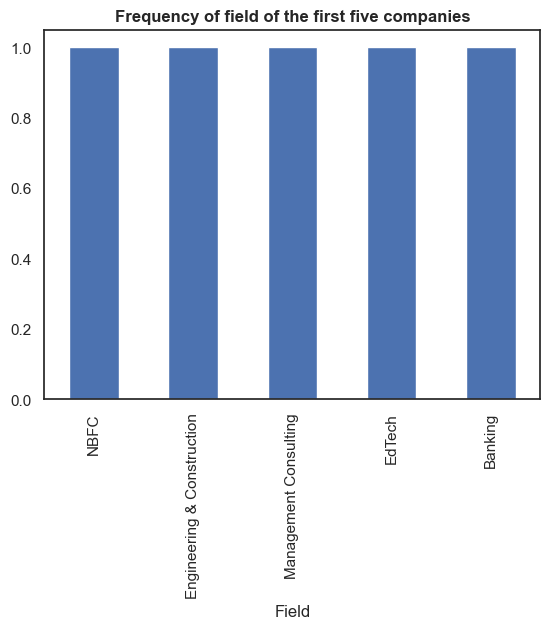

In [91]:
df['Field'].head().value_counts().plot(kind = 'bar')
plt.title('Frequency of field of the first five companies',fontweight = 'bold')
plt.show()

Each field (NBFC, Engineering & Construction, Management Consulting, EdTech, and Banking) is equally represented

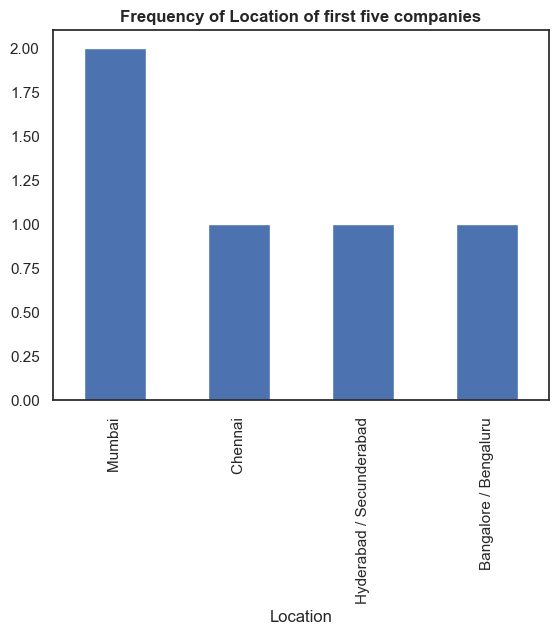

In [93]:
df['Location'].head().value_counts().plot(kind = 'bar')
plt.title('Frequency of Location of first five companies',fontweight = 'bold')
plt.show()

The bar graph indicates that among the first five companies, Mumbai has the highest frequency at 2, while Chennai, Secunderabad, and Bangalore/Bengaluru each appear once

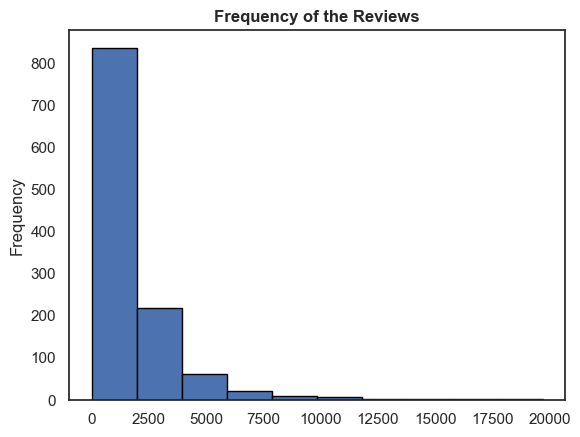

In [95]:
df['Reviews'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Reviews',fontweight = 'bold')
plt.show()

The histogram shows the frequency distribution of reviews, with most reviews concentrated in the lower range (0 to 2500) and the highest frequency bar reaching above 800. As the number of reviews increases, the frequency significantly decreases, indicating that fewer reviews fall into the higher ranges

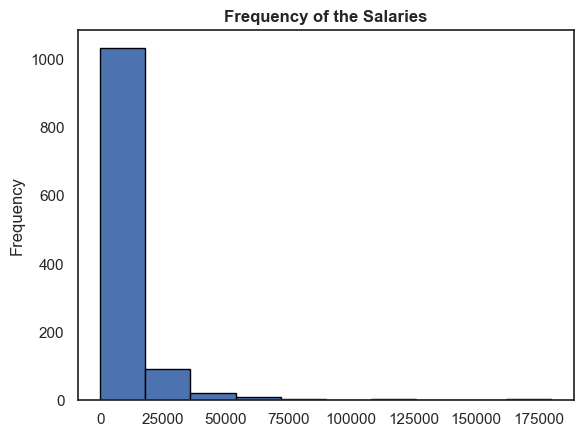

In [97]:
df['Salaries'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Salaries',fontweight = 'bold')
plt.show()

The histogram highlights the frequency distribution of salaries, depicting a concentration of salaries in the lower range. Wages between 0 and 25,000 have the highest frequency, exceeding 1,000 occurrences, while higher salaries become progressively less common.

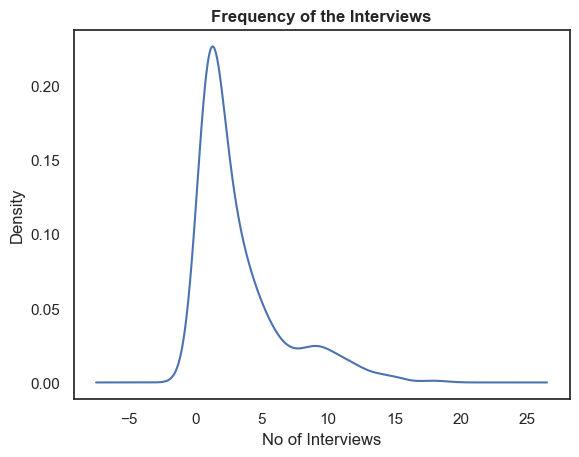

In [99]:
df['No_of_Interviews'].value_counts().plot(kind = 'kde')
plt.title('Frequency of the Interviews',fontweight = 'bold')
plt.xlabel("No of Interviews")
plt.show()

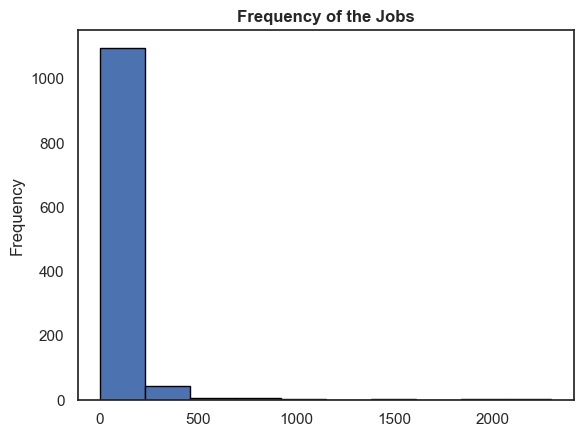

In [100]:
df['No_of_jobs'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Jobs',fontweight = 'bold')
plt.show()

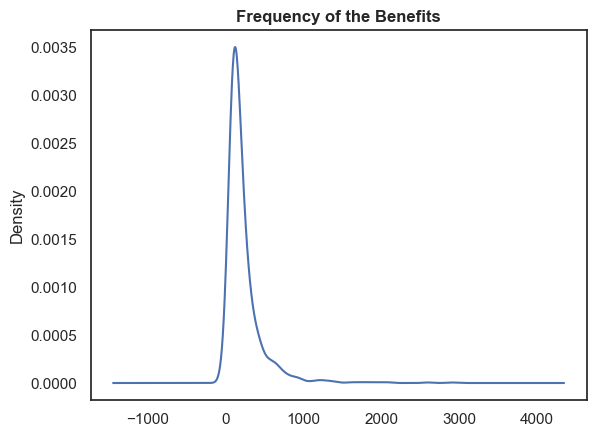

In [101]:
df['No_of_Benefits'].plot(kind = 'kde')
plt.title('Frequency of the Benefits',fontweight = 'bold')
plt.show()

### Bi Variate Analysis

In [103]:
df.columns

Index(['Company', 'Rating', 'Field', 'Location', 'Reviews', 'Salaries',
       'No_of_Interviews', 'No_of_jobs', 'No_of_Benefits'],
      dtype='object')

# Identifying Companies with the Highest Rating

In [105]:
top_20_rating = df.groupby(by='Company')['Rating'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_rating_df = top_20_rating.reset_index().rename(columns={'Rating': 'Number of Ratings'})
print(top_20_rating_df)

                          Company  Number of Ratings
0                     BNP Paribas                8.4
1                     LEAD School                7.3
2             Lavender Technology                5.0
3      United Alliance Technology                4.9
4                Marpu Foundation                4.9
5                       Tekwissen                4.9
6                        LivSpace                4.9
7                       InternEzy                4.9
8   Kogta Financial India Limited                4.8
9             Evision Technoserve                4.8
10                 Incheon Motors                4.8
11  Baazar Retail Private Limited                4.7
12               Kalyan Jewellers                4.7
13                Veritas Finance                4.7
14                    Indian Army                4.7
15            Wonder Home Finance                4.7
16                Sheenlac Paints                4.6
17                    Jet Airways             

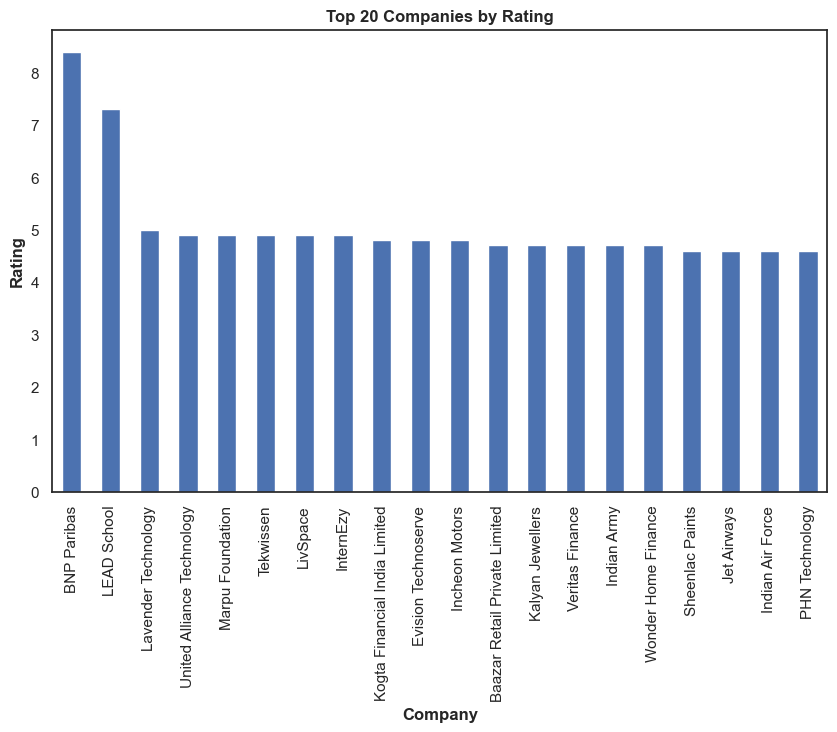

In [106]:
top_20_rating = df.groupby(by = 'Company')['Rating'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Companies by Rating',fontweight = 'bold')
plt.xlabel('Company',fontweight = 'bold')
plt.ylabel('Rating',fontweight = 'bold')
plt.show()

**BNP Paribas** has the highest rating, slightly above 8, followed by **LEAD School** around 7, indicating strong reputations.The remaining companies, like **Lavender Technology** and others, have ratings around 5, suggesting similar levels of satisfaction or performance among them.

# Identifying Companies with the Highest Reviews

In [109]:
top_20_reviews = df.groupby(by='Company')['Reviews'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_reviews_df = top_20_reviews.reset_index()
print(top_20_reviews_df)

                    Company  Reviews
0    HDB Financial Services    19700
1   Larsen & Toubro Limited    17900
2                  Deloitte    17000
3                     BYJUS    16000
4       Kotak Mahindra Bank    15900
5       Reliance Industries    15300
6             Vodafone Idea    15000
7             Bharti Airtel    13300
8               Tata Motors    11500
9     AU Small Finance Bank    11300
10                      WNS    10600
11            IndusInd Bank    10400
12                 Flipkart    10400
13            Ernst & Young    10200
14          IDFC FIRST Bank     9800
15           DXC Technology     9600
16      Mahindra & Mahindra     9500
17              Infosys BPM     9300
18            Bajaj Finserv     8800
19                HDFC Life     8600


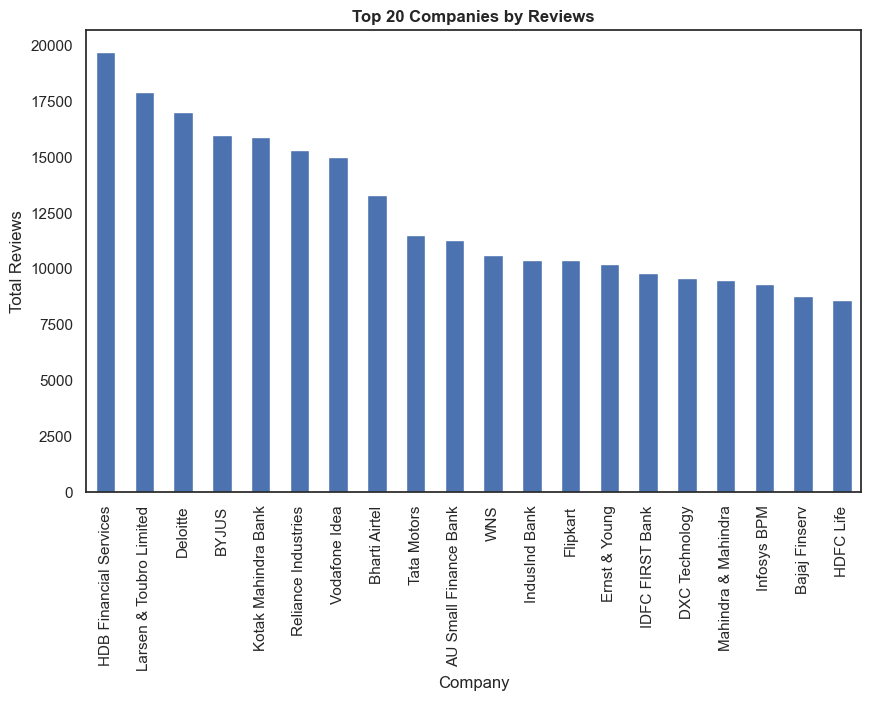

In [110]:
top_20_reviews = df.groupby(by = 'Company')['Reviews'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_reviews.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Companies by Reviews',fontweight = 'bold')
plt.xlabel('Company')
plt.ylabel('Total Reviews')
plt.show()

The graph shows that HDB Financial Services leads with the highest number of reviews, exceeding 20,000. Larsen & Toubro Limited and Deloitte follow closely with around 18,000 reviews each. Bajaj Finserv and HDFC Life have the fewest reviews, with slightly above 10,000. This indicates differing levels of customer engagement across these companies

# Trend of salaries

In [113]:
top_20_salaries = df.nlargest(20, 'Salaries')[['Company', 'Salaries']]
grouped_table = top_20_salaries.groupby('Company').agg('sum').reset_index()
grouped_table = grouped_table.sort_values(by='Salaries', ascending=False)

print(grouped_table)

                        Company  Salaries
2                      Deloitte  180000.0
3                 Ernst & Young  110000.0
14                          PwC   87100.0
10          Kotak Mahindra Bank   81000.0
1                DXC Technology   75000.0
11      Larsen & Toubro Limited   69300.0
8          JPMorgan Chase & Co.   69000.0
15          Reliance Industries   67100.0
12                      Mphasis   66900.0
7                   Infosys BPM   65200.0
0                         BYJUS   59000.0
18                          WNS   55800.0
13                       Oracle   55400.0
17                Vodafone Idea   54300.0
4                     HCL Group   53200.0
16  Virtusa Consulting Services   52100.0
9                    KPMG India   50900.0
5        HDB Financial Services   49900.0
19                  Wells Fargo   48900.0
6                 IndusInd Bank   47900.0


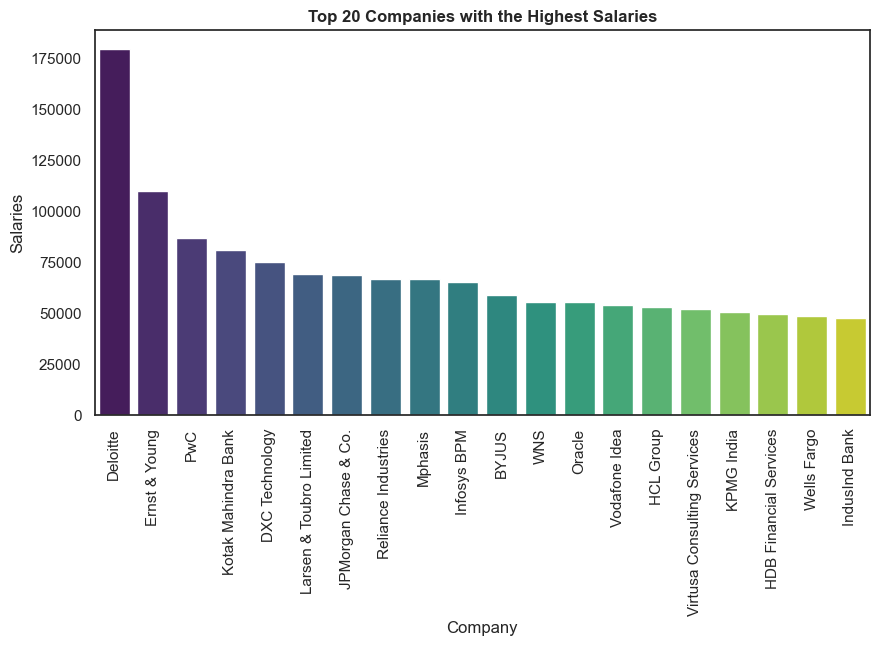

In [114]:
sns.set_theme(style="white")
top_20_salaries = df.nlargest(20, 'Salaries')[['Company', 'Salaries']]
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Company', y='Salaries', data=top_20_salaries, palette='viridis')
bar_plot.set_xlabel('Company',)
bar_plot.set_ylabel('Salaries')
bar_plot.set_title('Top 20 Companies with the Highest Salaries', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

The graph indicates a significant peak in salaries around the beginning, reaching approximately 180,000, followed by a sharp decline and fluctuating values. The overall trend shows a decrease in salary amounts as the x-axis values increase, highlighting variability.

# Identifying Companies with the Highest Number of Jobs

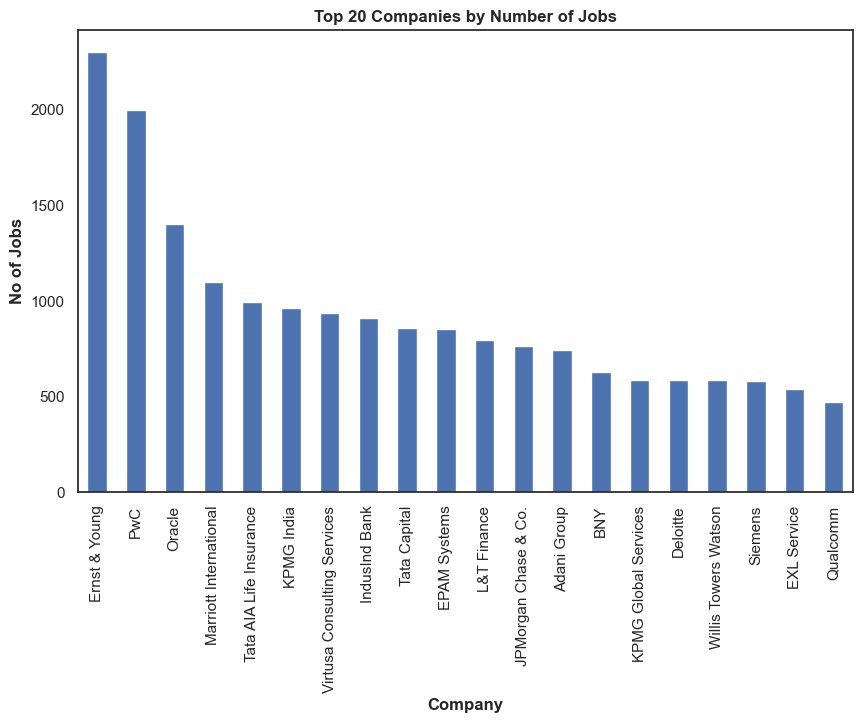

In [117]:
top_20_jobs = df.groupby(by='Company')['No_of_jobs'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_jobs.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Companies by Number of Jobs', fontweight='bold')
plt.xlabel('Company', fontweight='bold')
plt.ylabel('No of Jobs', fontweight='bold')
plt.show()

The graph illustrates that companies like Ernst & Young, PwC, and Oracle have the highest number of job openings. Meanwhile, Qualcomm offers the fewest job opportunities among the listed companies. This data highlights significant variations in job availability across different organizations

# Identifying Companies with the Highest Number of Interviews

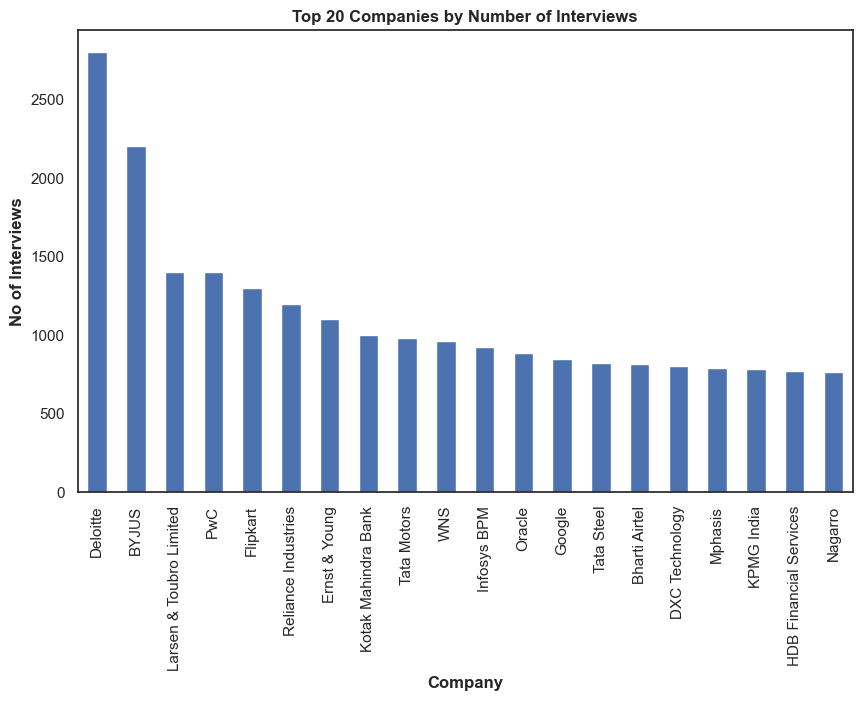

In [120]:
top_20_interviews = df.groupby(by='Company')['No_of_Interviews'].agg('sum').sort_values(ascending=False).nlargest(20)
top_20_interviews.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Companies by Number of Interviews', fontweight='bold')
plt.xlabel('Company', fontweight='bold')
plt.ylabel('No of Interviews', fontweight='bold')
plt.show()

The graph indicates that Deloitte has the highest number of interviews, surpassing 2500, followed by BYJUS with around 2000 interviews. Other companies like Larsen & Toubro Limited, PwC, and Flipkart also have significant interview numbers, highlighting their active recruitment efforts

# Ratings vs Field

In [123]:
top_20_ratings = df.nlargest(20, "Rating")
median_ratings = top_20_ratings.groupby('Field')['Rating'].median().sort_values(ascending=False)
median_ratings

Field
EdTech                      4.90
IT Services & Consulting    4.90
Non-Profit                  4.90
Software Product            4.90
Automobile                  4.80
Recruitment                 4.80
NBFC                        4.75
Jewellery                   4.70
Retail                      4.70
Defence & Aerospace         4.65
Financial Services          4.65
BPO                         4.60
Chemicals                   4.60
Healthcare                  4.60
Pune                        4.60
Name: Rating, dtype: float64

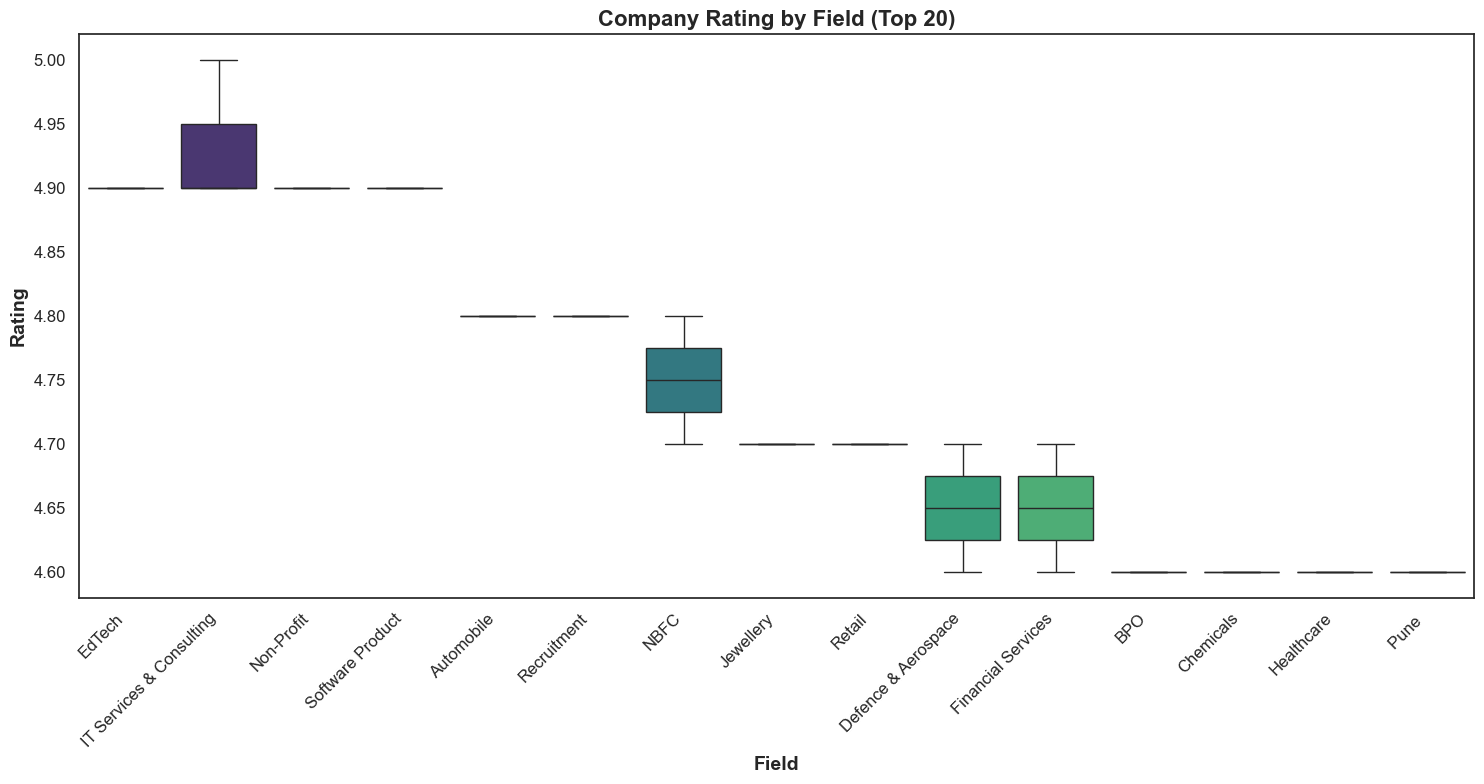

In [124]:
top_20_ratings = df.nlargest(20, "Rating")
plt.figure(figsize=(15, 8))
sns.boxplot(x='Field', y='Rating', data=top_20_ratings, palette='viridis', order=top_20_ratings.groupby('Field')['Rating'].median().sort_values(ascending=False).index)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Field', fontsize=14, fontweight='bold')
plt.ylabel('Rating', fontsize=14, fontweight='bold')
plt.title('Company Rating by Field (Top 20)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

The graph shows that IT Services & Consulting has the highest median rating among the fields listed, indicating strong overall performance. In contrast, Financial Services shows more variability with a wider range of ratings, suggesting mixed reviews in this sector.

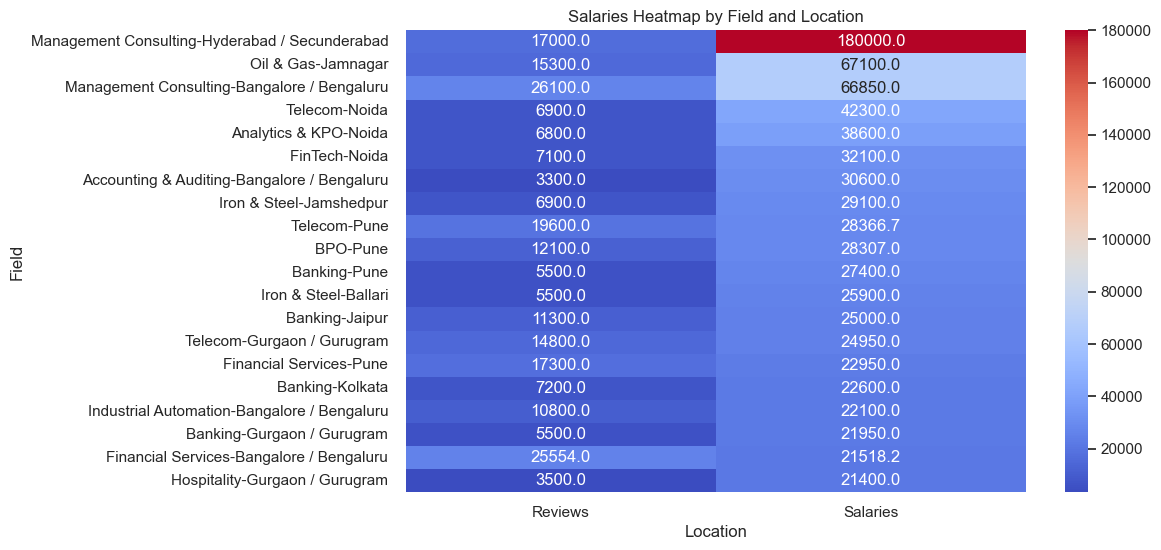

In [126]:
pivot_table = df.pivot_table(index=['Field', 'Location'], values=['Salaries', 'Reviews'], aggfunc={'Salaries': 'mean', 'Reviews': 'sum'})
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table.nlargest(20,"Salaries"), annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Salaries Heatmap by Field and Location")
plt.xlabel("Location")
plt.ylabel("Field")
plt.show()

The darkest shades in the heatmap indicate the highest salary ranges. We can observe that fields like "Management Consulting" in locations like "Hyderabad/Secunderabad" and "Bangalore/Bengaluru" seem to have the highest salary ranges, exceeding 180,000.

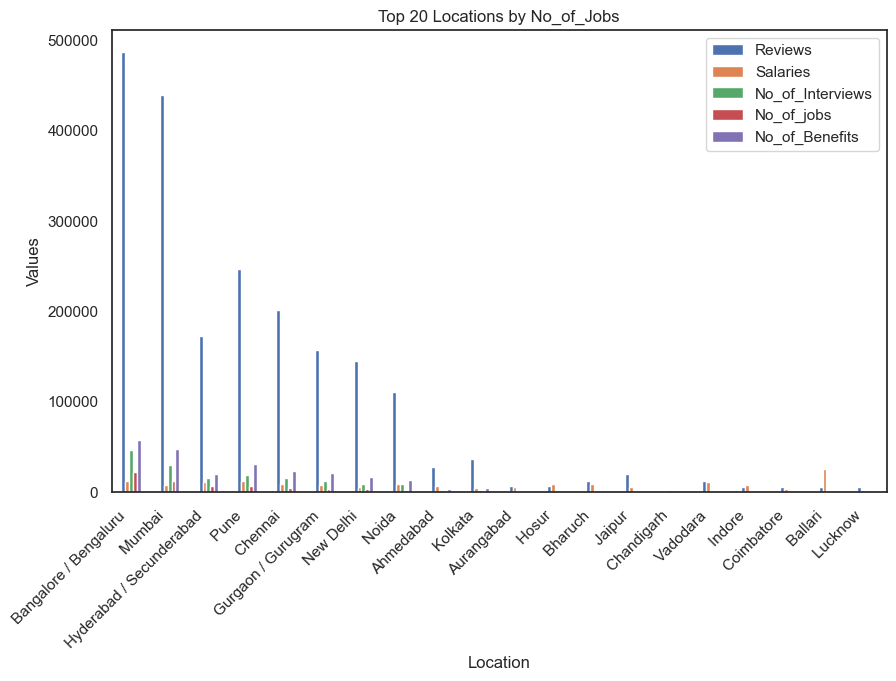

In [128]:
group_by = df.groupby('Location').agg({
    'Reviews': 'sum',
    'Salaries': 'mean',
    'No_of_Interviews': 'sum',
    'No_of_jobs': 'sum',
    'No_of_Benefits':'sum',
})
no_of_jobs_20 = group_by.nlargest(20,"No_of_jobs") 
fig, ax = plt.subplots(figsize=(10, 6))
no_of_jobs_20.plot(kind='bar',ax = ax)
ax.set_xlabel('Location')
ax.set_ylabel('Values')
ax.set_title('Top 20 Locations by No_of_Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()

# No.of.Benefits vs Salaries

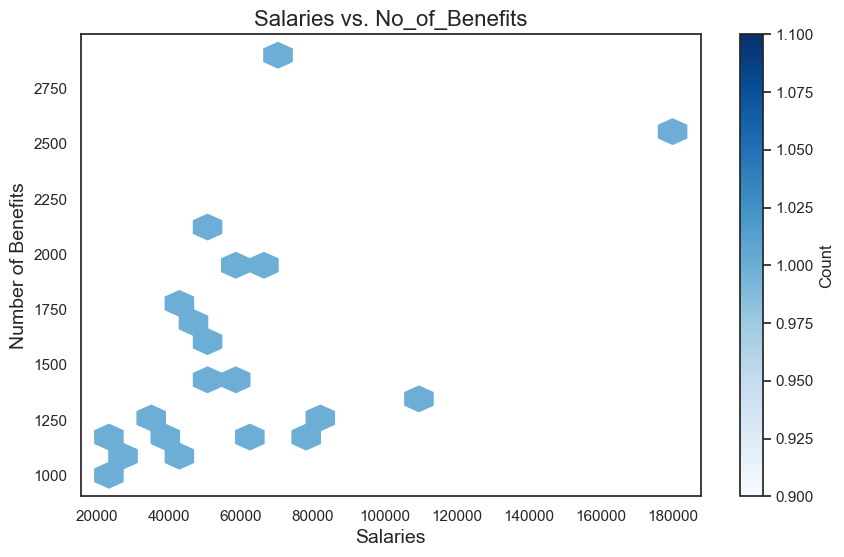

In [130]:
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
hexbin_plot = plt.hexbin(df.nlargest(20, "No_of_Benefits")['Salaries'], df.nlargest(20, "No_of_Benefits")['No_of_Benefits'], gridsize=20, cmap="Blues", mincnt=1)
cb = plt.colorbar(hexbin_plot)
cb.set_label('Count')
plt.title('Salaries vs. No_of_Benefits', fontsize=16)
plt.xlabel('Salaries', fontsize=14)
plt.ylabel('Number of Benefits', fontsize=14)
plt.show()

# No.of.Jobs vs Locations

<Figure size 1000x600 with 0 Axes>

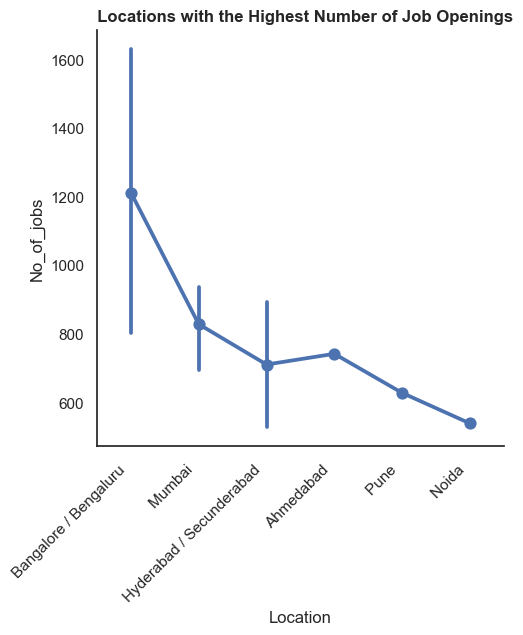

In [132]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
sns.catplot(x='Location', y='No_of_jobs', data=df.nlargest(20,"No_of_jobs"), kind='point') 
plt.xticks(rotation=45, ha='right')
plt.title('  Locations with the Highest Number of Job Openings',fontweight='bold')
plt.show()

Bangalore/Bengaluru leads with the most job opportunities, followed by Mumbai, Hyderabad/Secunderabad, and Ahmedabad. Pune and Noida have fewer jobs, with Noida having the least.

# Salaries vs. Location

In [135]:
grouped_df=df.groupby(['Location', 'Salaries']).sum()
top_10 = grouped_df.sort_values(by='Salaries',ascending=False).head(10)
top_10

Company  Rating  \
Location                  Salaries                                    
Hyderabad / Secunderabad  180000.0                 Deloitte     3.8   
Bangalore / Bengaluru     110000.0            Ernst & Young     3.5   
                          87100.0                       PwC     3.4   
Mumbai                    81000.0       Kotak Mahindra Bank     3.8   
Bangalore / Bengaluru     75000.0            DXC Technology     3.7   
Chennai                   69300.0   Larsen & Toubro Limited     4.0   
Bangalore / Bengaluru     69000.0      JPMorgan Chase & Co.     4.1   
Jamnagar                  67100.0       Reliance Industries     4.0   
Bangalore / Bengaluru     66900.0                   Mphasis     3.4   
                          65200.0               Infosys BPM     3.7   

                                                         Field  Reviews  \
Location                  Salaries                                        
Hyderabad / Secunderabad  180000.0       Management Consulting    17000   
Bangalore / Bengaluru     110000.0       Management Consulting    10200   
                          87100.0        Management Consulting     8600   
Mumbai                    81000.0                      Banking    15900   
Bangalore / Bengaluru     75000.0     IT Services & Consulting     9600   
Chennai                   69300.0   Engineering & Construction    17900   
Bangalore / Bengaluru     69000.0           Financial Services     5800   
Jamnagar                  67100.0                    Oil & Gas    15300   
Bangalore / Bengaluru     66900.0     IT Services & Consulting     7900   
                          65200.0                          BPO     9300   

                                    No_of_Interviews  No_of_jobs  \
Location                  Salaries                                 
Hyderabad / Secunderabad  180000.0            2800.0         585   
Bangalore / Bengaluru     110000.0            1100.0        2300   
                          87100.0             1400.0        2000   
Mumbai                    81000.0             1000.0          14   
Bangalore / Bengaluru     75000.0              803.0         221   
Chennai                   69300.0             1400.0         155   
Bangalore / Bengaluru     69000.0              746.0         767   
Jamnagar                  67100.0             1200.0          34   
Bangalore / Bengaluru     66900.0              789.0         129   
                          65200.0              925.0          26   

                                    No_of_Benefits  
Location                  Salaries                  
Hyderabad / Secunderabad  180000.0            2600  
Bangalore / Bengaluru     110000.0            1300  
                          87100.0              892  
Mumbai                    81000.0             1300  
Bangalore / Bengaluru     75000.0             1200  
Chennai                   69300.0             2900  
Bangalore / Bengaluru     69000.0              919  
Jamnagar                  67100.0             2000  
Bangalore / Bengaluru     66900.0              908  
                          65200.0             1200

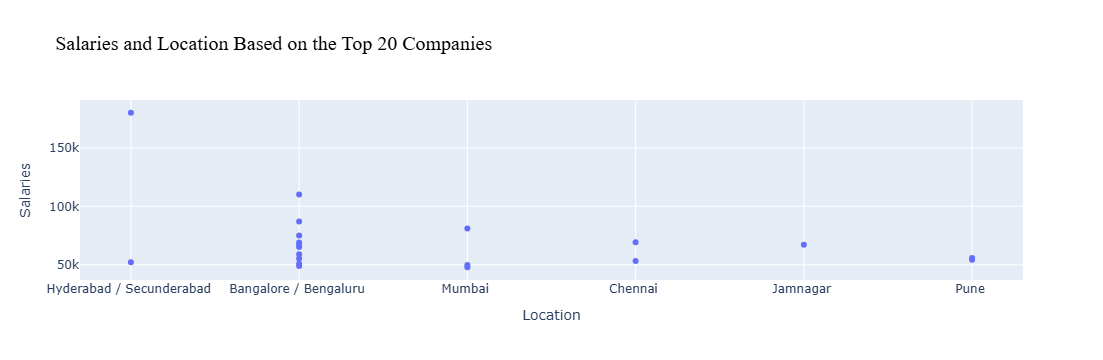

In [136]:
fig = px.scatter(df.nlargest(20, "Salaries"), x='Location', y='Salaries', title="Salaries and Location Based on the Top 20 Companies")
fig.update_layout(
    title={'text': "Salaries and Location Based on the Top 20 Companies", 'font': {'size': 20, 'color': 'black', 'family': 'bold'}},
    xaxis_title='Location',
    yaxis_title='Salaries',
)
fig.show()

# No.of.benefits vs Reviews

In [138]:
grouped_table = df.nlargest(20, "Reviews").groupby('Company')[['No_of_Benefits', 'Reviews']].sum().reset_index()
print(grouped_table)

                    Company  No_of_Benefits  Reviews
0     AU Small Finance Bank             495    11300
1                     BYJUS            1900    16000
2             Bajaj Finserv             764     8800
3             Bharti Airtel            1700    13300
4            DXC Technology            1200     9600
5                  Deloitte            2600    17000
6             Ernst & Young            1300    10200
7                  Flipkart            1400    10400
8    HDB Financial Services            1600    19700
9                 HDFC Life             652     8600
10          IDFC FIRST Bank             757     9800
11            IndusInd Bank             825    10400
12              Infosys BPM            1200     9300
13      Kotak Mahindra Bank            1300    15900
14  Larsen & Toubro Limited            2900    17900
15      Mahindra & Mahindra            1300     9500
16      Reliance Industries            2000    15300
17              Tata Motors            1800   

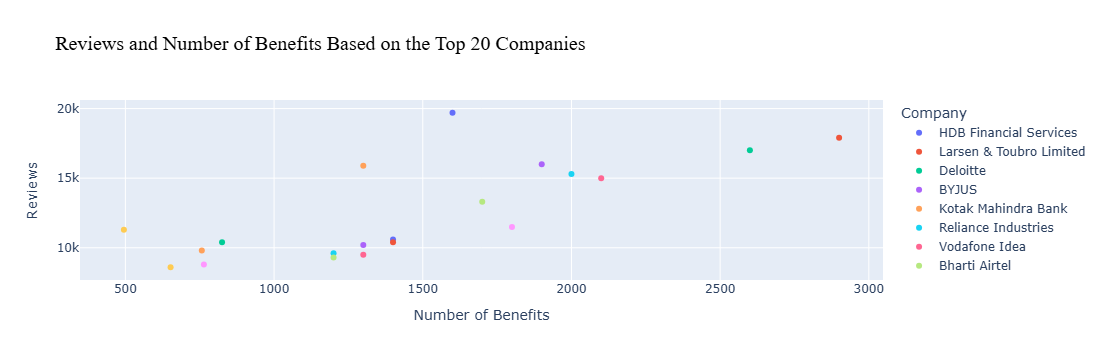

In [139]:
import plotly.express as px
fig = px.scatter(df.nlargest(20, "Reviews"), x='No_of_Benefits', y='Reviews', color='Company', size_max=100,
                 title="Reviews and Number of Benefits Based on the Top 20 Companies")
fig.update_layout(
    title={'text': "Reviews and Number of Benefits Based on the Top 20 Companies", 'font': {'size': 20, 'color': 'black', 'family': 'bold'}},
    xaxis_title='Number of Benefits',
    yaxis_title='Reviews',
    legend_title_text='Company',)
fig.show()

# Salaries vs Field

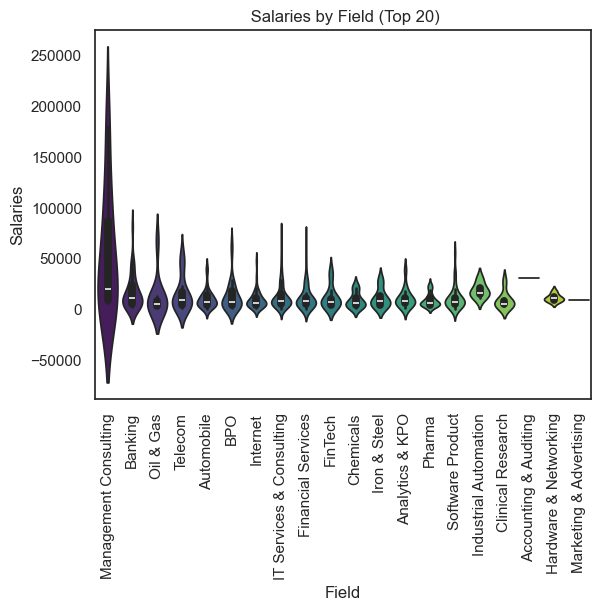

In [141]:
sns.set_theme(style="white")
top_20_fields = df.groupby('Field')['Salaries'].mean().nlargest(20).index
filtered_df = df[df['Field'].isin(top_20_fields)]
sns.violinplot(data=filtered_df, x='Field', y='Salaries', palette='viridis')
plt.title(' Salaries by Field (Top 20)')
plt.xlabel('Field')
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show()

# Rating vs Salaries

In [143]:
top_20_rating_salaries = df[['Company', 'Rating', 'Salaries']].nlargest(20, 'Rating')
grouped_table = top_20_rating_salaries.groupby('Company').agg({'Rating': 'mean', 'Salaries': 'mean'}).reset_index()
grouped_table = grouped_table.sort_values(by='Rating', ascending=False)
print(grouped_table)

                                       Company  Rating  Salaries
9                          Lavender Technology     5.0      16.0
10                                    LivSpace     4.9      34.0
11                            Marpu Foundation     4.9      42.0
17                  United Alliance Technology     4.9      34.0
6                                    InternEzy     4.9       5.0
16                                   Tekwissen     4.9     458.0
2                          Evision Technoserve     4.8     225.0
3                               Incheon Motors     4.8     216.0
8                Kogta Financial India Limited     4.8    1600.0
18                             Veritas Finance     4.7    1900.0
19                         Wonder Home Finance     4.7     594.0
1                Baazar Retail Private Limited     4.7    1200.0
7                             Kalyan Jewellers     4.7    1400.0
5                                  Indian Army     4.7    9300.0
12                       

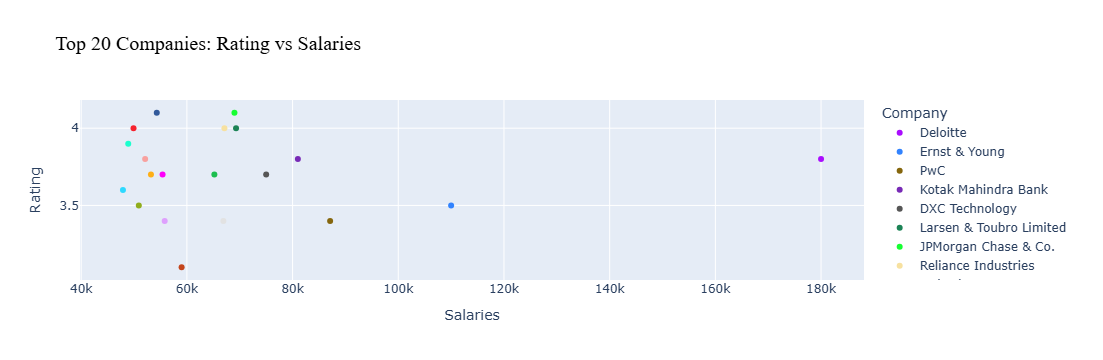

In [144]:
top_20_rating_salaries = df[['Company', 'Salaries', 'Rating']].nlargest(20, 'Salaries')
fig = px.scatter(top_20_rating_salaries, x='Salaries', y='Rating', color='Company', 
                 title="Top 20 Companies: Rating vs Salaries", 
                 labels={'Salaries': 'Salaries', 'Rating': 'Rating'}, 
                 color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(
    title={'text': "Top 20 Companies: Rating vs Salaries", 'font': {'size': 20, 'color': 'black', 'family': 'bold'}},
    xaxis_title='Salaries',
    yaxis_title='Rating',
    legend_title_text='Company',
)
fig.show()

# Ratings vs Number of Benefits

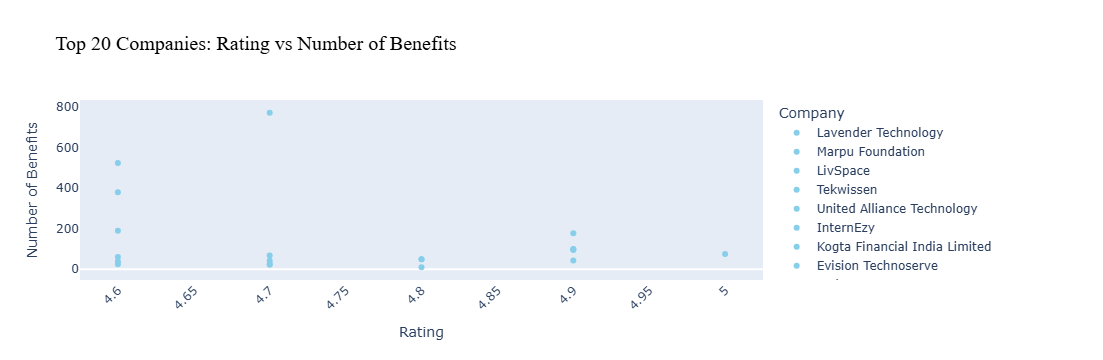

In [146]:
top_20_rating_benefits = df[['Company', 'Rating', 'No_of_Benefits']].nlargest(20, 'Rating')
fig = px.scatter(top_20_rating_benefits, x='Rating', y='No_of_Benefits', color='Company',
                 title="Top 20 Companies: Rating vs Number of Benefits",
                 labels={'Rating': 'Rating', 'No_of_Benefits': 'Number of Benefits'},
                 color_discrete_sequence=['skyblue'])
fig.update_layout(
    title={'text': "Top 20 Companies: Rating vs Number of Benefits", 'font': {'size': 20, 'color': 'black', 'family': 'bold'}},
    xaxis_title='Rating',
    yaxis_title='Number of Benefits',
    legend_title_text='Company',
    xaxis=dict(showgrid=False, tickangle=-45), 
    yaxis=dict(showgrid=False) 
)
fig.show()

### Multivariate Analysis

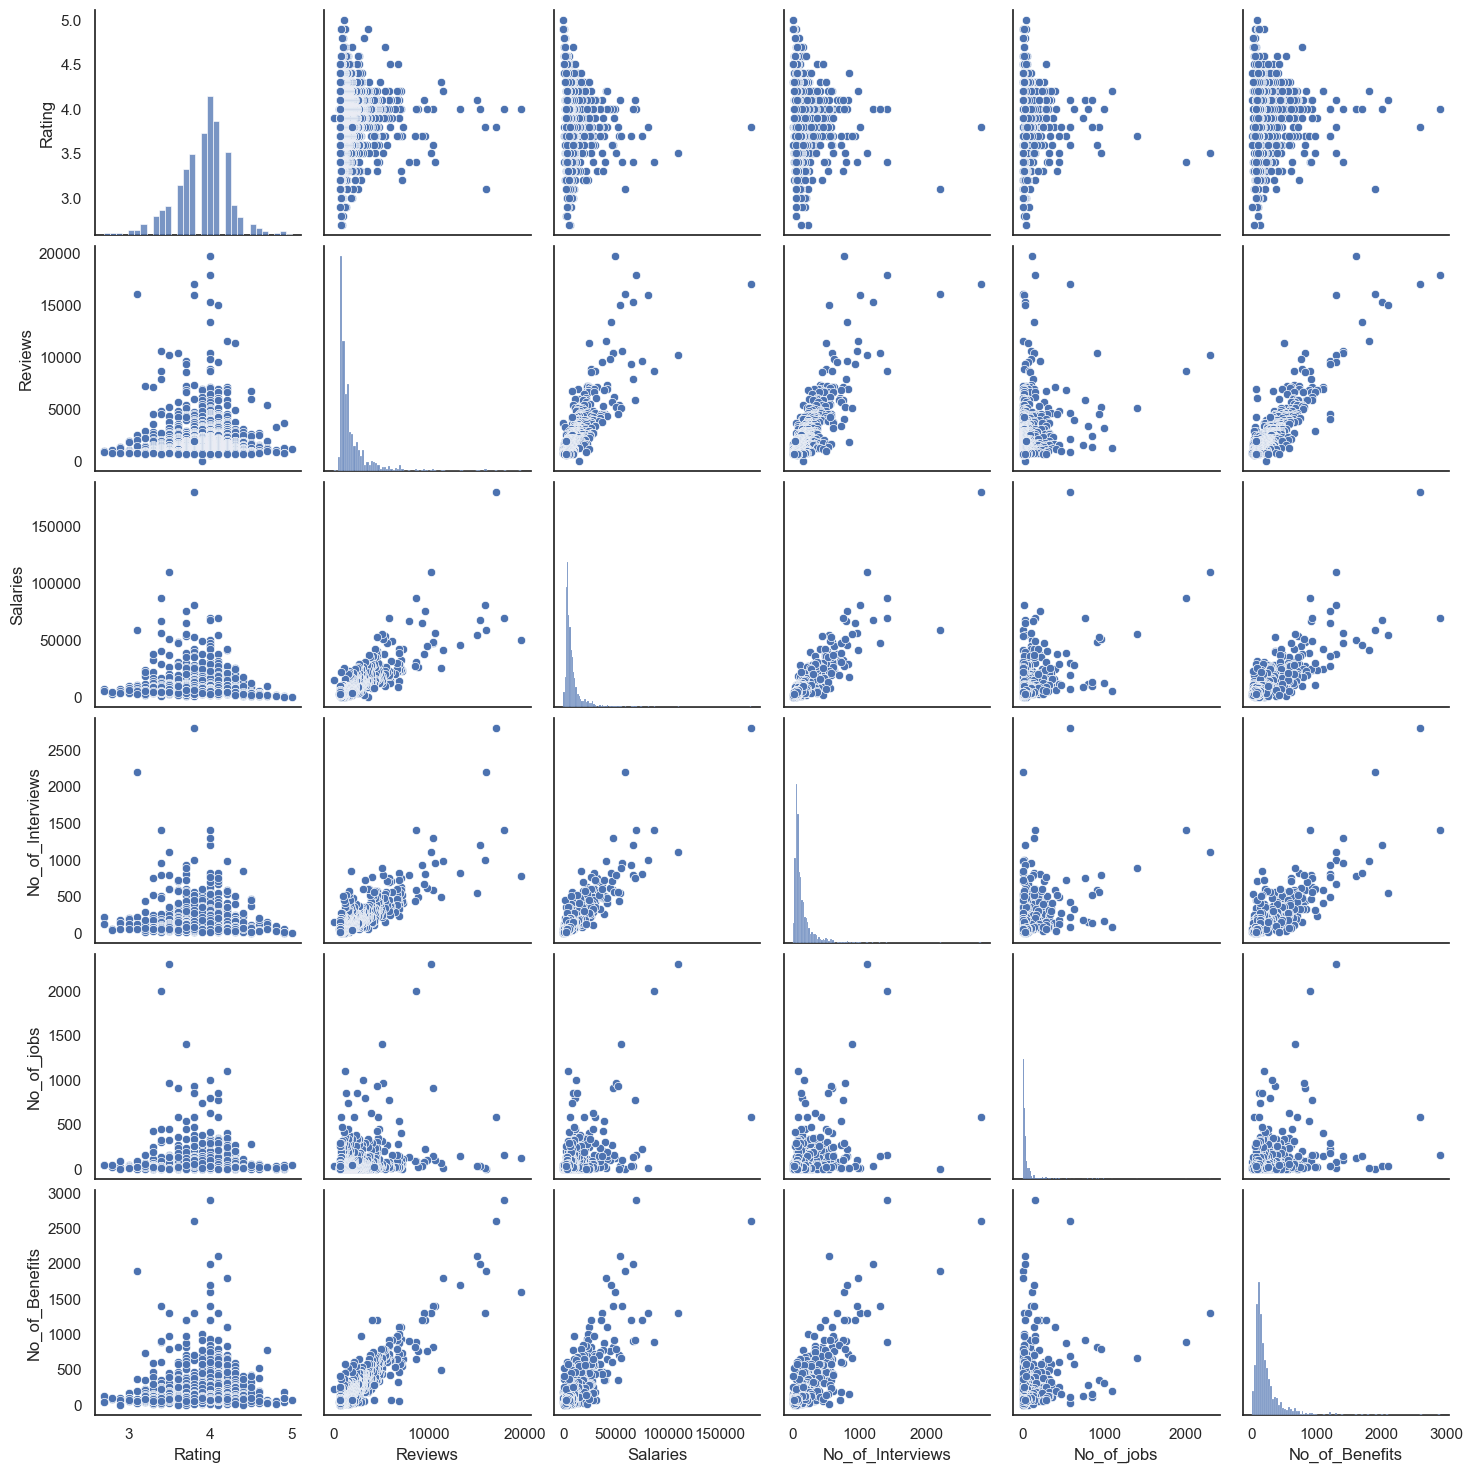

In [148]:
sns.pairplot(data = df)
plt.show()

<Axes: >

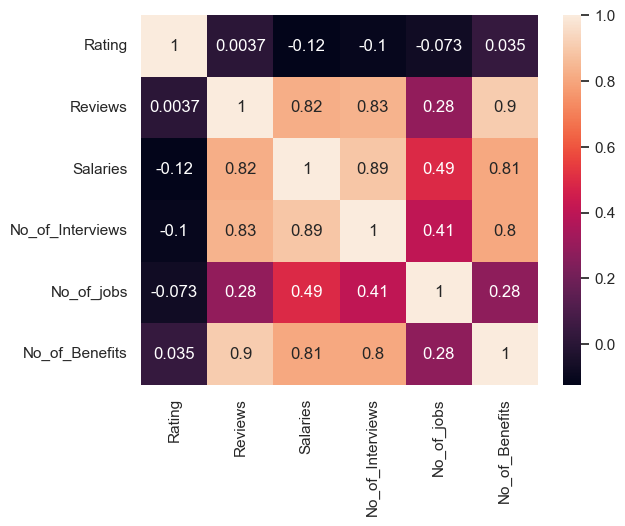

In [149]:
sns.heatmap(df.corr(numeric_only = True),annot = True)